# Load packages

%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import xarray as xr

In [3]:
from lib.utils import latest_version, fix_360_longitudes
from lib.interpolater import Interpolator

## Load UGT catalogue

In [4]:
# load catalogue
df = pd.read_csv("./catalogue/inventory_UDG.csv")

In [5]:
df

,location,activity,description,domain,ensemble,experiment,from,grid_label,institution,model,product,project,rcm,rcm_version,smg_activity,smg_kind,table,variable,version
0,https://data.meteo.unican.es/tds5/dodsC/Spain0...,UC-Spain02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://data.meteo.unican.es/tds5/dodsC/Spain0...,UC-Spain02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://data.meteo.unican.es/tds5/dodsC/Spain0...,UC-Spain02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://data.meteo.unican.es/tds5/dodsC/best/B...,BEST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://data.meteo.unican.es/tds5/dodsC/best/B...,BESTmon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18953,https://data.meteo.unican.es/thredds/dodsC/eth...,CMIP5,CMIP5 NcMLs for ATLAS AR6 from ETHZ snapshot,NaN,r1i1p1,rcp85,ESGF,NaN,NaN,bcc-csm1-1,output,CMIP5,NaN,NaN,ATLAS,project,day,NaN,NaN
18954,https://data.meteo.unican.es/thredds/dodsC/eth...,CMIP5,CMIP5 NcMLs for ATLAS AR6 from ETHZ snapshot,NaN,r1i1p1,rcp85,ESGF,NaN,NaN,inmcm4,output,CMIP5,NaN,NaN,ATLAS,project,day,NaN,NaN
18955,https://data.meteo.unican.es/thredds/dodsC/mir...,ERA5,NaN,NaN,NaN,NaN,CDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data,NaN,NaN,NaN
18956,https://data.meteo.unican.es/thredds/dodsC/mir...,ERA5,NaN,NaN,NaN,NaN,CDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data,NaN,NaN,NaN


In [6]:
# extract CMIP6 models with daily resolution
df_CMIP6 = df[(df["activity"] == "CMIP6") &
              (df["table"] == "day")]

In [7]:
df_CMIP6

,location,activity,description,domain,ensemble,experiment,from,grid_label,institution,model,product,project,rcm,rcm_version,smg_activity,smg_kind,table,variable,version
23,https://data.meteo.unican.es/thredds/dodsC/CMI...,CMIP6,CMIP6 NcMLs for ATLAS AR6,NaN,r1i1p1f1,historical,ESGF,NaN,AS-RCEC,TaiESM1,CMIP,CMIP6,NaN,NaN,ATLAS,project,day,NaN,NaN
30,https://data.meteo.unican.es/thredds/dodsC/CMI...,CMIP6,CMIP6 NcMLs for ATLAS AR6,NaN,r1i1p1f1,historical,ESGF,NaN,AWI,AWI-CM-1-1-MR,CMIP,CMIP6,NaN,NaN,ATLAS,project,day,NaN,NaN
37,https://data.meteo.unican.es/thredds/dodsC/CMI...,CMIP6,CMIP6 NcMLs for ATLAS AR6,NaN,r1i1p1f1,historical,ESGF,NaN,BCC,BCC-CSM2-MR,CMIP,CMIP6,NaN,NaN,ATLAS,project,day,NaN,NaN
46,https://data.meteo.unican.es/thredds/dodsC/CMI...,CMIP6,CMIP6 NcMLs for ATLAS AR6,NaN,r2i1p1f1,historical,ESGF,NaN,CAMS,CAMS-CSM1-0,CMIP,CMIP6,NaN,NaN,ATLAS,project,day,NaN,NaN
61,https://data.meteo.unican.es/thredds/dodsC/CMI...,CMIP6,CMIP6 NcMLs for ATLAS AR6,NaN,r1i1p1f1,historical,ESGF,NaN,CAS,FGOALS-g3,CMIP,CMIP6,NaN,NaN,ATLAS,project,day,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18568,https://data.meteo.unican.es/thredds/dodsC/esg...,CMIP6,CMIP6 ESGF replica temporal aggregation,NaN,r1i1p1f1,ssp585,ESGF,gn,NUIST,NESM3,ScenarioMIP,CMIP6,NaN,NaN,replica,data,day,pr,v20190811
18569,https://data.meteo.unican.es/thredds/dodsC/esg...,CMIP6,CMIP6 ESGF replica temporal aggregation,NaN,r1i1p1f1,ssp585,ESGF,gn,NUIST,NESM3,ScenarioMIP,CMIP6,NaN,NaN,replica,data,day,psl,v20190811
18570,https://data.meteo.unican.es/thredds/dodsC/esg...,CMIP6,CMIP6 ESGF replica temporal aggregation,NaN,r1i1p1f1,ssp585,ESGF,gn,NUIST,NESM3,ScenarioMIP,CMIP6,NaN,NaN,replica,data,day,tas,v20190811
18571,https://data.meteo.unican.es/thredds/dodsC/esg...,CMIP6,CMIP6 ESGF replica temporal aggregation,NaN,r1i1p1f1,ssp585,ESGF,gn,NUIST,NESM3,ScenarioMIP,CMIP6,NaN,NaN,replica,data,day,tasmax,v20190811


In [8]:
np.unique(df_CMIP6["model"])

array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR',
       'CAMS-CSM1-0', 'CESM2', 'CESM2-WACCM', 'CMCC-CM2-SR5',
       'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'CanESM5',
       'EC-Earth3', 'EC-Earth3-AerChem', 'EC-Earth3-Veg',
       'EC-Earth3-Veg-LR', 'FGOALS-g3', 'GFDL-CM4', 'GFDL-ESM4',
       'HadGEM3-GC31-LL', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0',
       'IPSL-CM6A-LR', 'KACE-1-0-G', 'KIOST-ESM', 'MIROC-ES2L', 'MIROC6',
       'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0',
       'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL'],
      dtype=object)

In [9]:
# extract "CanESM5" model for the sceneario "ssp245" the variable "tas" and the last "version"
df_CMIP6_subset = df_CMIP6[(df_CMIP6["model"]=="CESM2") & 
                           (df_CMIP6["experiment"]=="historical") & 
                           (df_CMIP6["variable"]=="tas")]

In [10]:
# extract simulation (last_version)
df_CMIP6_simulation = df_CMIP6_subset[
                        df_CMIP6_subset["version"]==latest_version(df_CMIP6_subset)] 
df_CMIP6_simulation

,location,activity,description,domain,ensemble,experiment,from,grid_label,institution,model,product,project,rcm,rcm_version,smg_activity,smg_kind,table,variable,version
4166,https://data.meteo.unican.es/thredds/dodsC/esg...,CMIP6,CMIP6 ESGF replica ensemble aggregation,NaN,NaN,historical,ESGF,gn,NCAR,CESM2,CMIP,CMIP6,NaN,NaN,replica,data,day,tas,v20190308
11616,https://data.meteo.unican.es/thredds/dodsC/esg...,CMIP6,CMIP6 ESGF replica temporal aggregation,NaN,r1i1p1f1,historical,ESGF,gn,NCAR,CESM2,CMIP,CMIP6,NaN,NaN,replica,data,day,tas,v20190308
11638,https://data.meteo.unican.es/thredds/dodsC/esg...,CMIP6,CMIP6 ESGF replica temporal aggregation,NaN,r4i1p1f1,historical,ESGF,gn,NCAR,CESM2,CMIP,CMIP6,NaN,NaN,replica,data,day,tas,v20190308


## Open all member with xarray (open_dataset)


In [11]:
dataset = xr.open_dataset(df_CMIP6_simulation.loc[4166]['location'], 
                          chunks={"time":100})

/oceano/gmeteo/users/diezsj/miniconda3/envs/cmip6-downscaling/lib/python3.9/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [12]:
dataset

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 60226, ensemble: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
  * ensemble   (ensemble) |S64 b'r1i1p1f1' b'r4i1p1f1'
Dimensions without coordinates: nbnd
Data variables:
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
    time_bnds  (time, nbnd) object dask.array<chunksize=(100, 2), meta=np.ndarray>
    tas        (ensemble, time, lat, lon) float32 dask.array<chunksize=(2, 100, 192, 288), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T21:32:05Z
    ...                     ...
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    size:                   2147483647
    size_human:             14.1 GiB

## Open all member with xarray (open_mfdataset)

In [13]:
def extract_ensemble(ds):
    if 'variant_label' in ds.attrs.keys():
        return ds.assign_coords(ensemble=ds.attrs['variant_label'])
    raise ValueError("variant_label missing: {0}".format(self.search_time_attr))

In [14]:
dataset = xr.open_mfdataset(list(df_CMIP6_simulation['location'].iloc[1:]), 
                            preprocess=extract_ensemble,
                            concat_dim = 'ensemble',
                            combine = 'nested',
                            chunks={"time":100})

In [15]:
# fix 360 longitudes
dataset = fix_360_longitudes(dataset, 'CMIP6', 'lon')

/oceano/gmeteo/users/diezsj/miniconda3/envs/cmip6-downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [18]:
# monthly aggregation
dataset_mon = dataset.resample(time="M").mean()

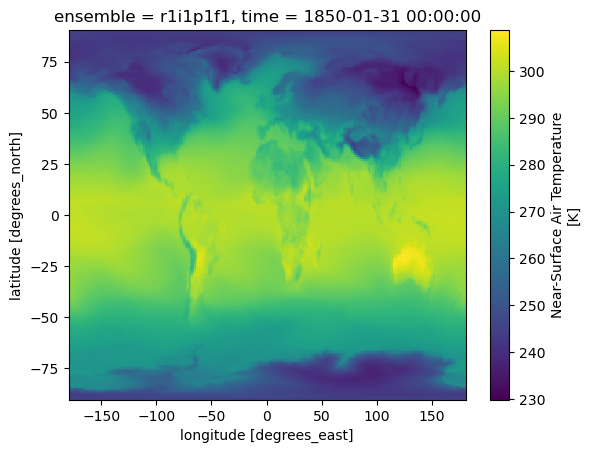

In [19]:
dataset_mon['tas'].isel(time=0, ensemble=0).plot()

In [20]:
# select area
dataset_mon_subset = dataset_mon.sel(lat=slice(32, 65), 
                                     lon=slice(-15, 30))

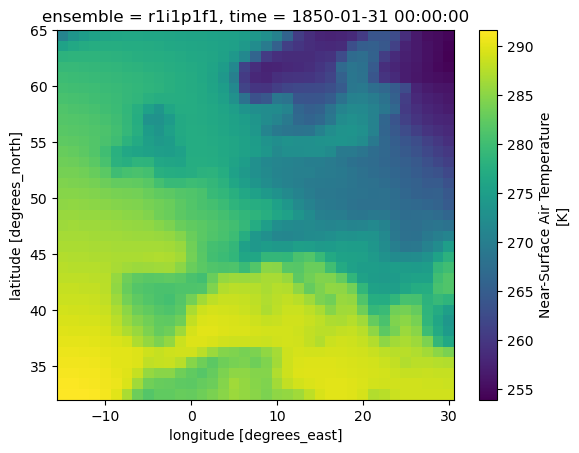

In [21]:
dataset_mon_subset['tas'].isel(time=0, ensemble=0).plot()

## Interpolate data

In [29]:
# Interpolate data
int_attr = {'interpolation_method' : 'conservative_normed', 
            'lats' : np.arange(32, 65, 0.5),
            'lons' : np.arange(-15, 30, 0.5),
            'var_name' : 'tas'
}

In [30]:
# 
INTER = Interpolator(int_attr)

In [31]:
ds_inter = INTER(dataset_mon_subset)

In [32]:
ds_inter

,Array,Chunk
Bytes,89.78 MiB,23.20 kiB
Shape,"(1981, 2, 66, 90)","(1, 1, 66, 90)"
Count,39099 Tasks,3962 Chunks
Type,float32,numpy.ndarray


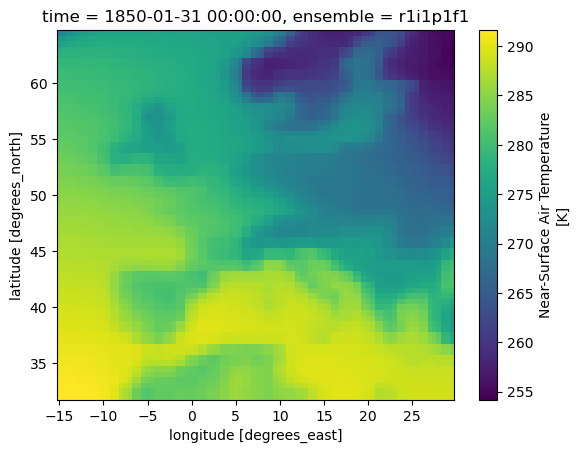

In [33]:
ds_inter['tas'].isel(time=0, ensemble=0).plot()